In [1]:
pip install scikit-learn


In [3]:
pip install --pre notebook


Note: you may need to restart the kernel to use updated packages.


In [4]:
!python -V


Python 3.11.4


Model saved as random_forest_model.joblib
ROC AUC Score on Validation Set: 0.85301933125948


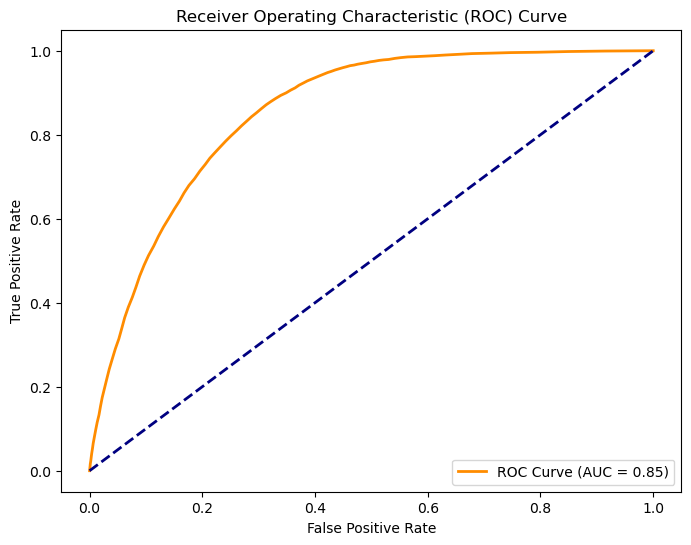

Submission file created as submission.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import joblib

# Load the training dataset
train_path = 'C:/Users/aman/Desktop/Kaggle/Rishiraj/train.csv'
train_data = pd.read_csv(train_path)

# Drop the 'id' column as it doesn't provide useful information
train_data = train_data.drop('id', axis=1)

# Separate features (X) and target variable (y)
X = train_data.drop('smoking', axis=1)
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can be beneficial for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')

# Make predictions on the validation set
y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model using ROC AUC score
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f'ROC AUC Score on Validation Set: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Load the test dataset
test_path = 'C:/Users/aman/Desktop/Kaggle/Rishiraj/test.csv'
test_data = pd.read_csv(test_path)

# Drop the 'id' column as it doesn't provide useful information
test_data = test_data.drop('id', axis=1)

# Preprocess the test data similarly to the training data
X_test_scaled = scaler.transform(test_data)  # Use the same scaler from training data

# Use the trained model to make predictions on the test data
y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Create a submission file in the required format
submission_df = pd.DataFrame({'id': test_data.index, 'smoking': y_test_pred_proba})
submission_df.to_csv('submission.csv', index=False)

# Print a message indicating that the submission file is created
print('Submission file created as submission.csv')
